# Data Description

**RowNumber:** Row Numbers from 1 to 10000                     
**CustomerId:** Unique Ids for bank customer identification         
**Surname:** Customer's last name                 
**CreditScore:** Credit score of the customer                 
**Geography:** The country from which the customer belongs                 
**Gender:** Male or Female          
**Age:** Age of the customer                                                    
**Tenure:** Number of years for which the customer has been with the bank                                 
**Balance:** Bank balance of the customer                                    
**NumOfProducts:** Number of bank products the customer is utilising                                
**HasCrCard:** Binary Flag for whether the customer holds a credit card with the bank or not                    
**IsActiveMember:** Binary Flag for whether the customer is an active member with the bank or not                      
**EstimatedSalary:** Estimated salary of the customer in Dollars                                              
**Exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained                     

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

ChurnData = pd.read_csv('C:/Users/HP/Desktop/Ivy/3.Python/Projects/Churn_Modelling.csv',encoding = 'latin')

print('Shape before removing duplicates:',ChurnData.shape)

ChurnData.drop_duplicates()

print('Shape after removing duplicates:',ChurnData.shape)

ChurnData.head()

Shape before removing duplicates: (10000, 14)
Shape after removing duplicates: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Defining the problem statement:

Create a Predictive model which can tell weather the customer exited or not?            
**Target Variable:** Exited                                           
**Predictors:** CustomerId, CreditScore, HasCrCard, Balance etc.
    
Exited:0, means the consumer has not exited, he is still taking services.            
Exited:1, means the consumer has exited, he is not anymore associated with the company.

# Determining the type of Machine Learning

Based on the problem statement it is quite clear that we will have to create **Supervised ML Classification model**,as the target variable is binary.

# Data Distribution of Target Variable

<AxesSubplot:xlabel='Exited'>

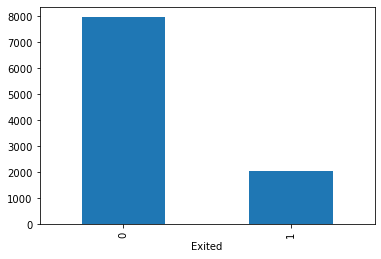

In [4]:
ChurnData.groupby('Exited').size().plot(kind='bar')

There are enough numbers of rows in Target Variable in both categories for the model to learn.

# Basic Data Exploration

In [5]:
ChurnData.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [6]:
ChurnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
ChurnData.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Basic Data Exploration Results

The selected columns in this step are not final, further study will be done and then a final list will be created

**-Exited:** Categorical. Selected. This is the Target Variable.      
**-RowNumber:** Qualitative. **Rejected.** This column does not affect the churn rate.                 
**-CustomerId:** Qualitative. **Rejected.** This column does not affect the churn rate.            
**-Surname:** Qualitative. **Rejected.** This column does not affect the churn rate.                 
**-CreditScore:** Continuous. Selected.                          
**-Geography:** Categorical. Selected.                   
**-Gender:** Categorical. Selected.                                         
**-Age:** Continuous. Selected.          
**-Tenure:** Continuous. Selected.        
**-Balance:** Continuous. Selected.            
**-NumOfProducts:** Categorical. Selected.             
**-HasCrCard:** Categorical. Selected.            
**-IsActiveMember:** Categorical. Selected.            
**-EstimatedSalary:** Continuous. Selected.                     


# Removing useless variables from data

In [8]:
ChurnData.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
UselessColumns = ['RowNumber','CustomerId','Surname']

ChurnData = ChurnData.drop(UselessColumns,axis=1)
ChurnData.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visual Exploratory Data Analysis

**Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

Categorical Predictors: 'Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember'

In [10]:
# Plotting multiple bar charts at once for categorical variables

def PlotBarCharts(inpData,ColsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, SubPlots = plt.subplots(nrows = 1,ncols=len(ColsToPlot),figsize=(30,12))
    fig.suptitle('Bar Charts of'+str(ColsToPlot))
    
    for colName, plotNumber in zip(ColsToPlot,range(len(ColsToPlot))):
        inpData.groupby(colName).size().plot(kind = 'bar',ax=SubPlots[plotNumber])
    

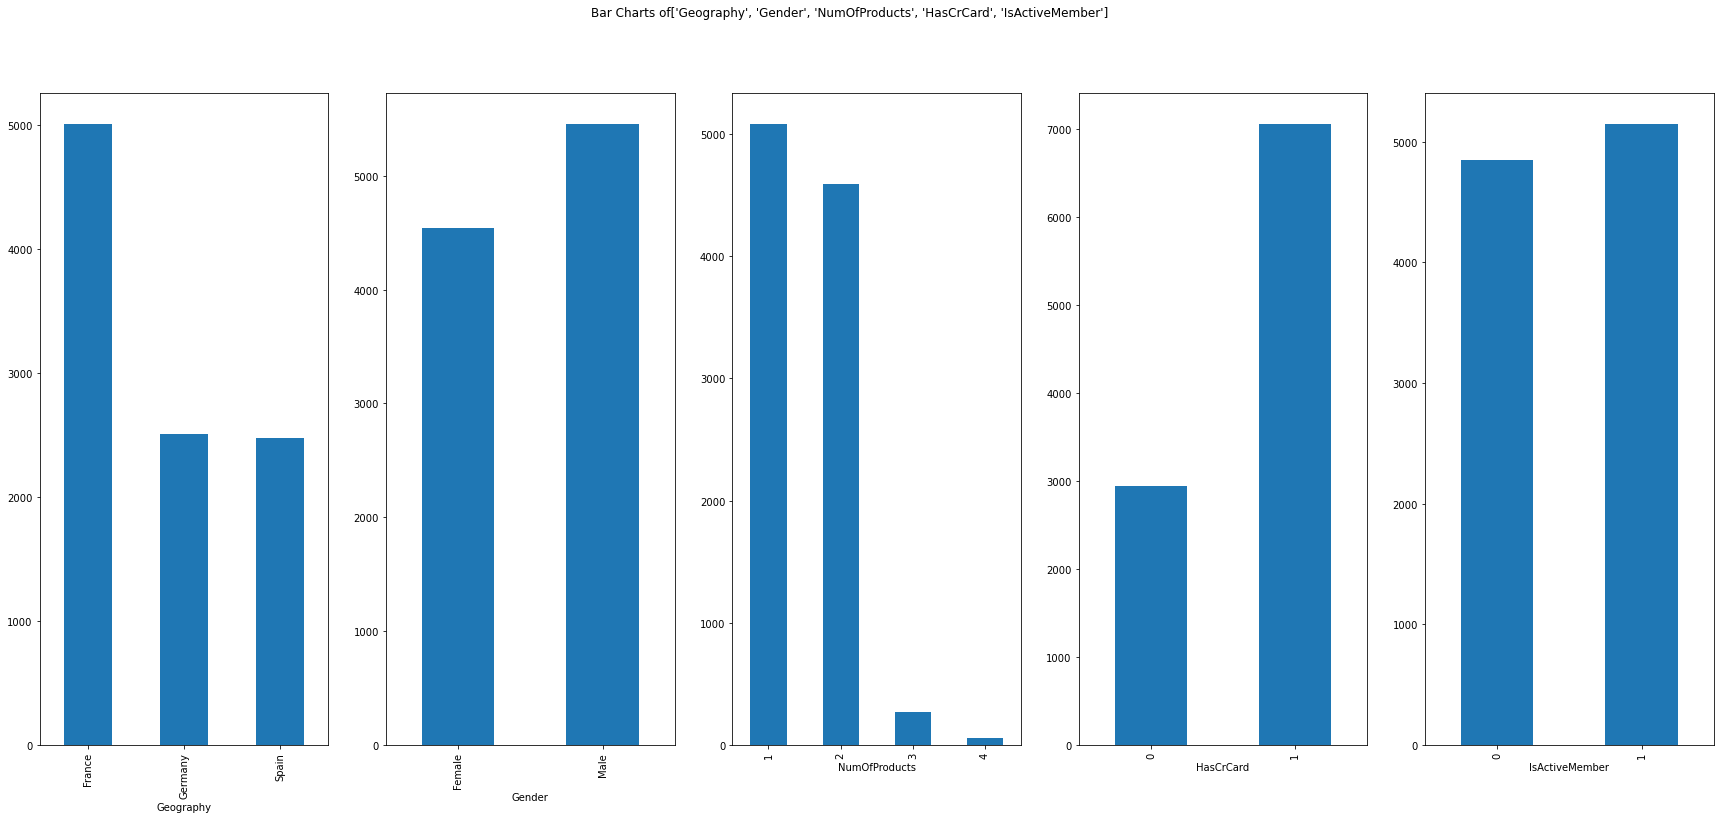

In [11]:
# Calling the function
PlotBarCharts(inpData=ChurnData,ColsToPlot=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember'])

**Bar Plots' Interpretation:** For all the variables data is well distributed in all the categories, so all the varibles are selected.

**Selected Categorical columns:** 'Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember'

**Visualize distribution of all the Continuous Predictor variables in the data using Histogram.**

Continuous Predictors: 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>, <AxesSubplot:>]],
      dtype=object)

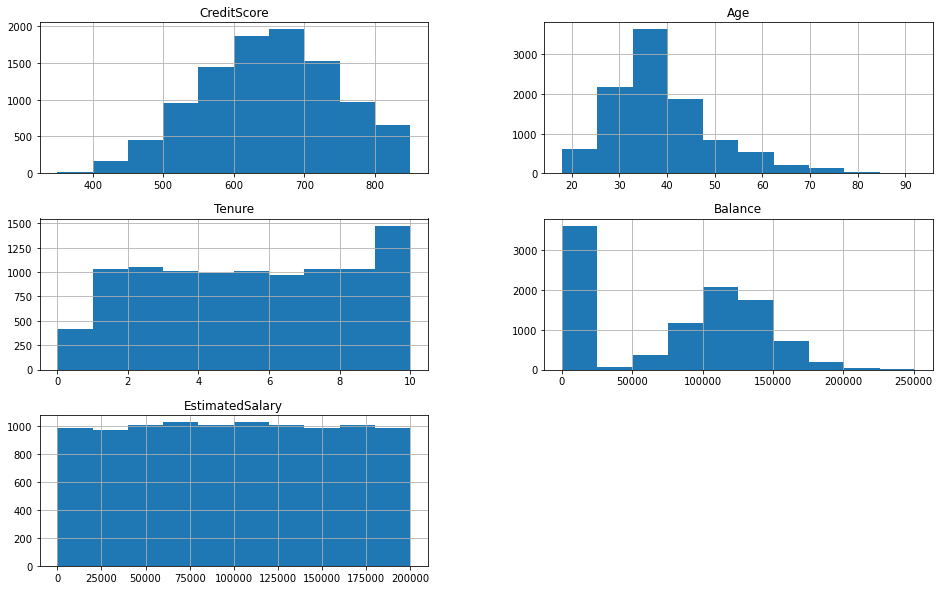

In [12]:
ChurnData.hist(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'],figsize=(16,10))

**Histogram Interpretation:** There is no such predictor which has problem of Outliers. So, all the varibales are selected.
    
**Selected Continuous Variables:** 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'

# Missing Values Treatment

In [13]:
ChurnData.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values in the data.

# Feature Selection

# Categorical Vs Continuous: Box-Plot

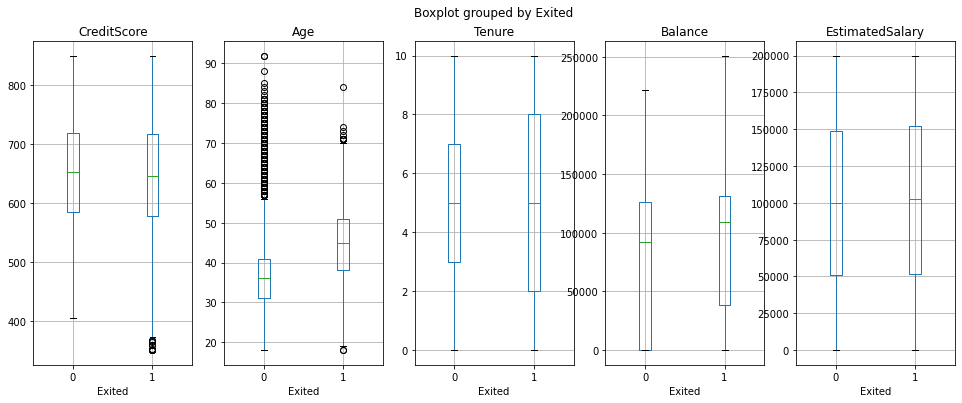

In [14]:
ContinuousColsList = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows = 1,ncols=len(ContinuousColsList),figsize=(16,6))

for Predictor, i in zip(ContinuousColsList,range(len(ContinuousColsList))):
    ChurnData.boxplot(column=Predictor,by='Exited',figsize=(5,5),vert=True,ax=PlotCanvas[i])

**Box-Plot Interpretation:** Look at the chart "Tenure Vs Exited". Boxes are almost in same line! It means that people who has exited has less or more Tenure, it is difficult to distinguish. 
And same holds for Estimated Salary.

We will confirm this in ANOVA Test

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)

In [15]:
def FunctionAnova(inpData,TargetVariable,ContinousPredictorList):
    from scipy.stats import f_oneway
    
    SelectedPredictors = []
    
    print('\n#### ANOVA Results #####\n')
    
    for predictor in ContinousPredictorList:
        CategoryGroupLists = inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1]<0.05):
            print(predictor,'is correlated with',TargetVariable,'|P-value',AnovaResults[1])
            SelectedPredictors.append(predictor)
            
        else:
            print(predictor,'is NOT correlated with',TargetVariable,'P-Value',AnovaResults[1])
            
    return(SelectedPredictors)

In [16]:
FunctionAnova(inpData=ChurnData,TargetVariable='Exited',ContinousPredictorList=['CreditScore', 'Age', 
                                                                                'Tenure', 'Balance', 'EstimatedSalary'])


#### ANOVA Results #####

CreditScore is correlated with Exited |P-value 0.006738213892205324
Age is correlated with Exited |P-value 1.2399313093445346e-186
Tenure is NOT correlated with Exited P-Value 0.1615268494946745
Balance is correlated with Exited |P-value 1.2755633191546494e-32
EstimatedSalary is NOT correlated with Exited P-Value 0.22644042802263928


['CreditScore', 'Age', 'Balance']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

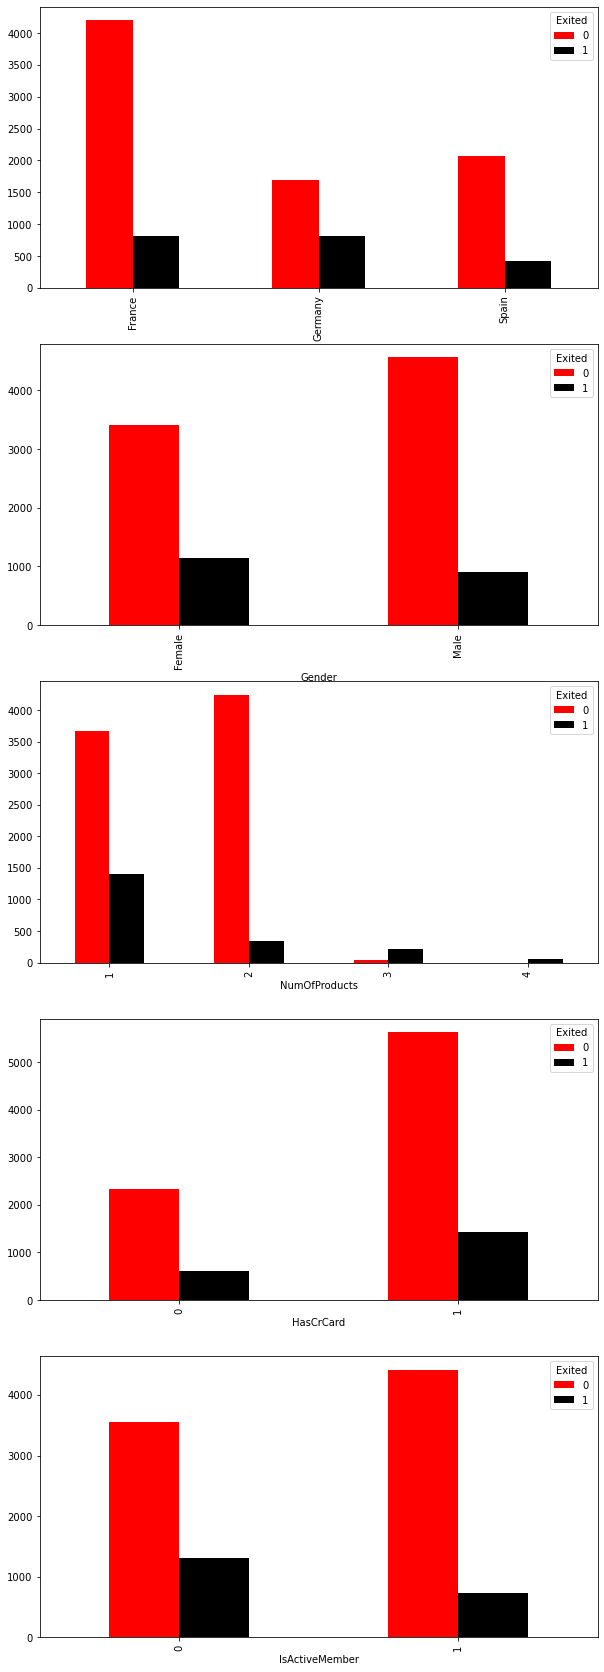

In [17]:
CategoricalColsList = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows=len(CategoricalColsList),ncols=1,figsize=(10,30))

for CategoricalCol, i in zip(CategoricalColsList,range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=ChurnData[CategoricalCol],columns=ChurnData['Exited'])
    CrossTabResult.plot.bar(color=['red','black'],ax=PlotCanvas[i])

**Bar Chart Interpretation:** All the varibales apart from 'HasCrCard' looks correlated with the Target Variable.

We will confirm this through Chi-Sq Test.

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other  
Result of Chi-Sq Test: The Probability of H0 being True

In [18]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [19]:
CategoricalVariable  =['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

FunctionChisq(inpData=ChurnData, TargetVariable='Exited', CategoricalVariablesList=CategoricalVariable)

Geography is correlated with Exited | P-Value: 3.830317605354266e-66
Gender is correlated with Exited | P-Value: 2.2482100097131755e-26
NumOfProducts is correlated with Exited | P-Value: 0.0
HasCrCard is NOT correlated with Exited | P-Value: 0.49237236141554686
IsActiveMember is correlated with Exited | P-Value: 8.785858269303703e-55


['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'Geography', 'Gender', 'NumOfProducts', 'IsActiveMember'

# Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [20]:
SelectedColumns = ['CreditScore', 'Age', 'Balance','Geography', 'Gender', 'NumOfProducts', 'IsActiveMember']

DataForML = ChurnData[SelectedColumns]
DataForML.head()

,CreditScore,Age,Balance,Geography,Gender,NumOfProducts,IsActiveMember
0,619,42,0.00,France,Female,1,1
1,608,41,83807.86,Spain,Female,1,1
2,502,42,159660.80,France,Female,3,0
3,699,39,0.00,France,Female,2,0
4,850,43,125510.82,Spain,Female,1,1


In [21]:
# Saving this final data for reference during deployment
DataForML.to_pickle('ChurnModelling.pkl')

# Data Pre-processing for Machine Learning


# Converting the binary nominal variable to numeric using 1/0 mapping

In [22]:
DataForML['Gender'].replace({'Female':0,'Male':1},inplace = True)
DataForML.head()

,CreditScore,Age,Balance,Geography,Gender,NumOfProducts,IsActiveMember
0,619,42,0.00,France,0,1,1
1,608,41,83807.86,Spain,0,1,1
2,502,42,159660.80,France,0,3,0
3,699,39,0.00,France,0,2,0
4,850,43,125510.82,Spain,0,1,1


# Converting the nominal variable to numeric using get_dummies()

In [23]:
DataForML_numeric = pd.get_dummies(DataForML)

DataForML_numeric['Exited']=ChurnData['Exited']

DataForML_numeric.head()

,CreditScore,Age,Balance,Gender,NumOfProducts,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,0.00,0,1,1,1,0,0,1
1,608,41,83807.86,0,1,1,0,0,1,0
2,502,42,159660.80,0,3,0,1,0,0,1
3,699,39,0.00,0,2,0,1,0,0,0
4,850,43,125510.82,0,1,1,0,0,1,0


# Machine Learning: Splitting the data into Training and Testing sample

In [24]:
# Printing all the column names for our reference
DataForML_numeric.columns

Index(['CreditScore', 'Age', 'Balance', 'Gender', 'NumOfProducts',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Exited'],
      dtype='object')

In [25]:
TargetVariable = 'Exited'
Predictors = ['CreditScore', 'Age', 'Balance', 'Gender', 'NumOfProducts',
       'IsActiveMember', 'Geography_France', 'Geography_Germany']

X = DataForML_numeric[Predictors].values
y = DataForML_numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=515)

In [26]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 8)
(7000,)
(3000, 8)
(3000,)


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=3,penalty='l2',solver='newton-cg')

print(clf)

LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(prediction,y_test))

f1_score=metrics.f1_score(y_test,prediction,average='weighted')
print('Accuracy of the model on Testing Sample data:',round(f1_score,2))

from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(LOG,X,y,cv=10,scoring='f1_weighted')
print('\nAccuracy values for 10-fold cross validation:\n',Accuracy_values)
print('\nAverag Accuracy for 10-fold cross validation:\n',round(Accuracy_values.mean(),2))

LogisticRegression(C=3, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2388
           1       0.62      0.24      0.35       612

    accuracy                           0.82      3000
   macro avg       0.73      0.60      0.62      3000
weighted avg       0.79      0.82      0.78      3000

[[2300  466]
 [  88  146]]
Accuracy of the model on Testing Sample data: 0.78

Accuracy values for 10-fold cross validation:
 [0.7673211  0.7673211  0.77966204 0.76271296 0.76991376 0.76925569
 0.77992383 0.79393815 0.7713029  0.76689351]

Averag Accuracy for 10-fold cross validation:
 0.77


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=8)
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2388
           1       0.71      0.51      0.59       612

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.75      3000
weighted avg       0.85      0.86      0.85      3000

[[2261  301]
 [ 127  311]]

Accuracy of the model in Testing Sample Data: 0.78

 Accuracy values of 10-fold cross validation: [0.84321162 0.83717376 0.86256158 0.84844566 0.84047685 0.83491978
 0.84974148 0.86695005 0.84280836 0.84307248]

 Average accuracy of 10-fold cross validation: 0.85


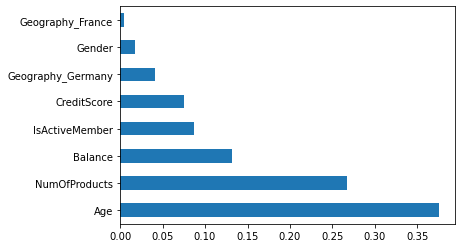

In [30]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=8,criterion='entropy')

print(clf)

DT = clf.fit(X_train,y_train)
prediction = DT.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(prediction,y_test))

F1_score = metrics.f1_score(y_test,prediction,average='weighted')
print('\nAccuracy of the model in Testing Sample Data:',round(f1_score,2))

%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_,index = Predictors)
feature_importances.nlargest(10).plot(kind='barh')

from sklearn.model_selection import cross_val_score

Accuracy_values = cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')
print('\n Accuracy values of 10-fold cross validation:',Accuracy_values)
print('\n Average accuracy of 10-fold cross validation:',round(Accuracy_values.mean(),2))

# Plotting the Decision Tree

In [31]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'D:\\anaconda3\\Library\\bin\\graphviz'

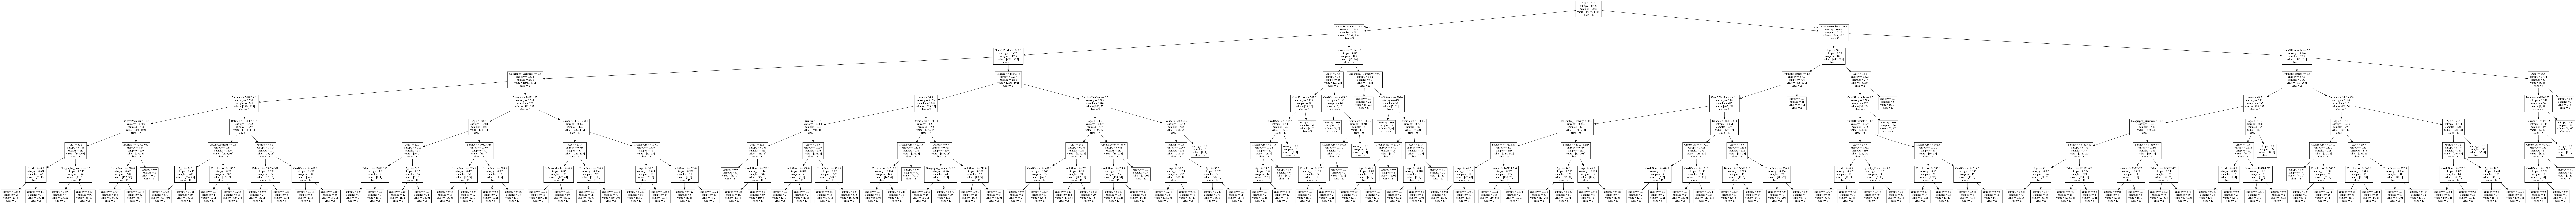

In [32]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)
# Double click on the graph to zoom in

# Random Forest

RandomForestClassifier(max_depth=3, n_estimators=800)
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2388
           1       0.95      0.13      0.23       612

    accuracy                           0.82      3000
   macro avg       0.88      0.56      0.56      3000
weighted avg       0.84      0.82      0.76      3000

[[2384    4]
 [ 533   79]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.77897376 0.7533828  0.78155886 0.7499601  0.77600909 0.75916199
 0.75540169 0.77848284 0.76205084 0.76145772]

Final Average Accuracy of the model: 0.77


<AxesSubplot:>

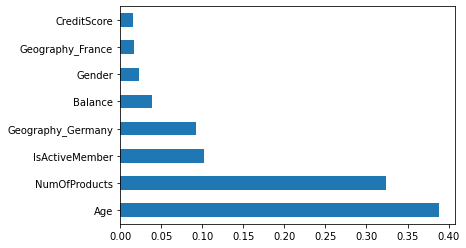

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, n_estimators=800,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Plotting one of the Decision Trees in Random Forest

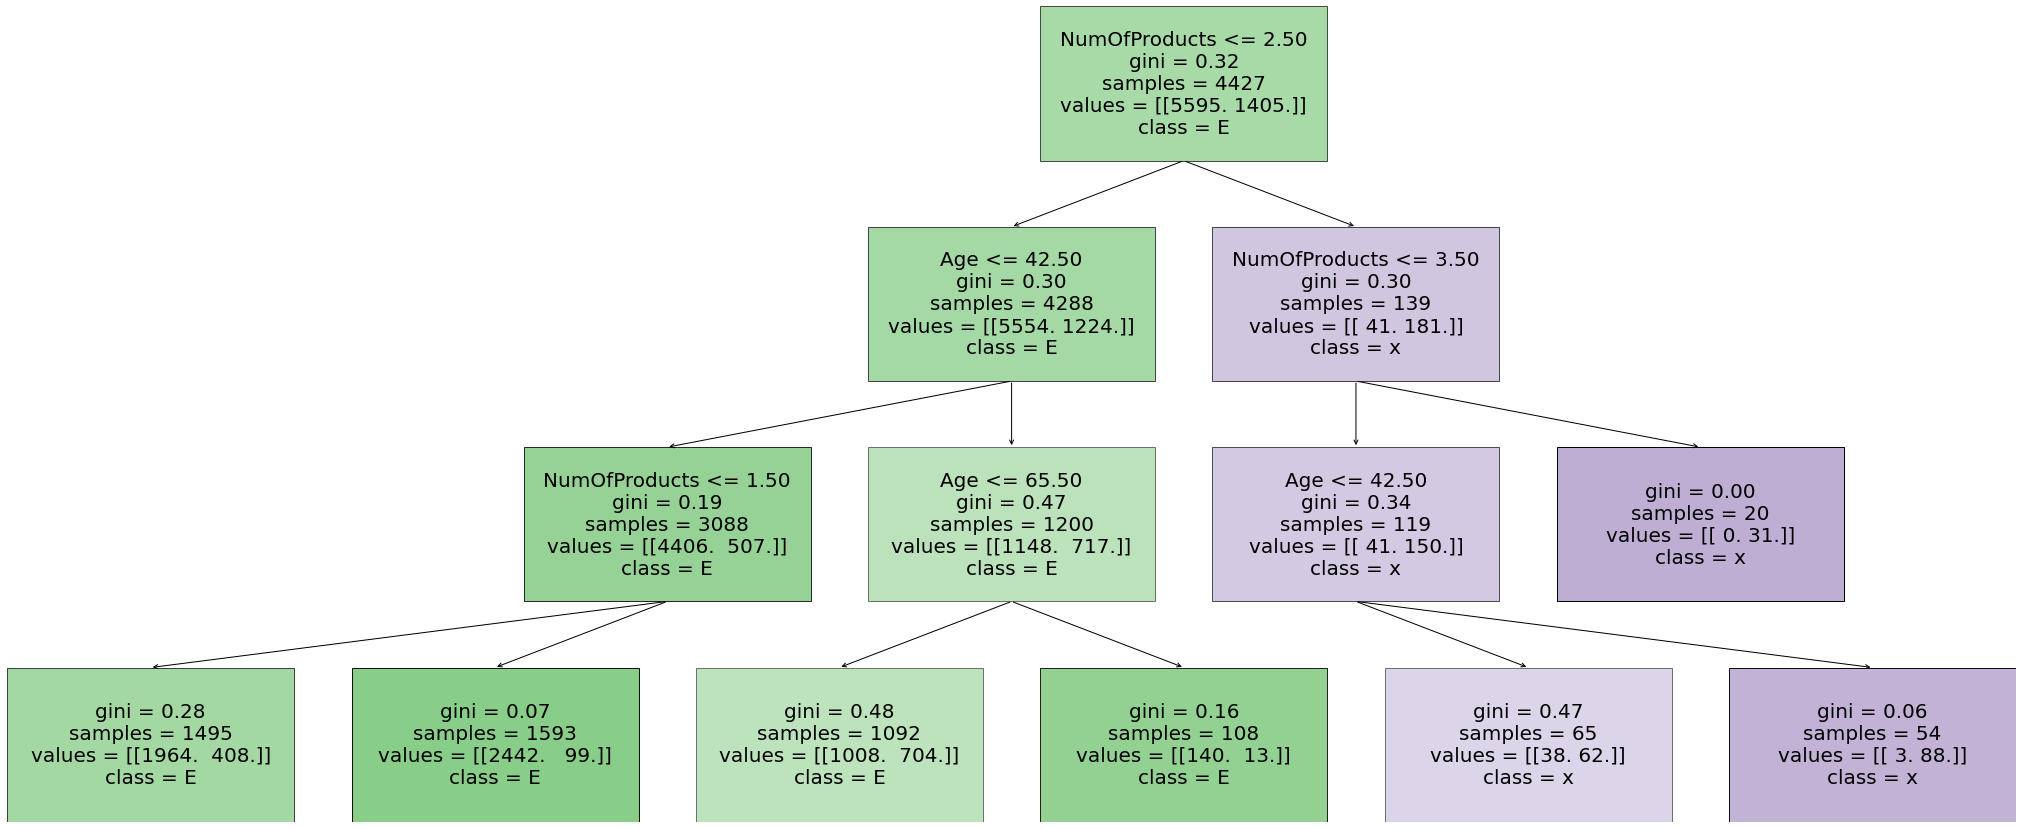

In [34]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=1000)
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2388
           1       0.82      0.35      0.49       612

    accuracy                           0.85      3000
   macro avg       0.84      0.67      0.70      3000
weighted avg       0.85      0.85      0.83      3000

[[2340   48]
 [ 396  216]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.8173632  0.8014537  0.84718744 0.82419052 0.82462348 0.82317176
 0.84154353 0.83763859 0.81296439 0.81824968]

Final Average Accuracy of the model: 0.82


<AxesSubplot:>

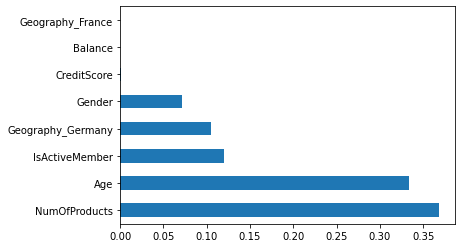

In [35]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=1000, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Plotting one of the Decision trees from Adaboost

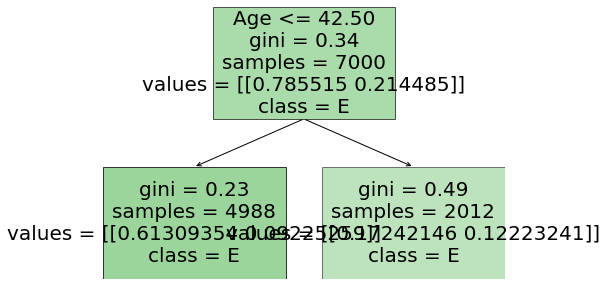

In [36]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# XGBoost

In [37]:
!pip install xgboost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[19:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

  

<AxesSubplot:>

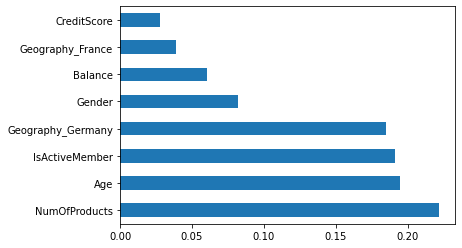

In [38]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.01, n_estimators=800, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Plotting a single Decision tree out of XGBoost

<AxesSubplot:>

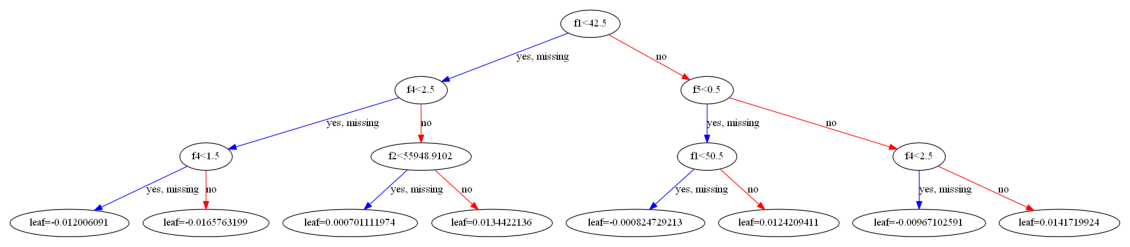

In [39]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)